# IPL Score prediction

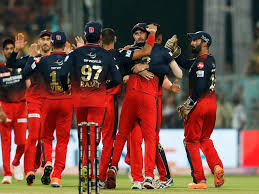

The Dataset contains ball by ball information of the matches played between IPL Teams of Season 1 to 10, i.e. from 2008 to 2017.
This Machine Learning model adapts a Regression Appoach to predict the score of the First Inning of an IPL Match.
The Dataset can be downloaded from Kaggle from here.

# Factors

1.no of wickets in hand 
2.number of balls left
3.batsmen is settled or not
4.winning percentage of the team
5.wickets lost in last 5 overs
6.pitch condition
7.how strong batting or bowling


In [37]:
import numpy as np
import pandas as pd
import pickle

In [38]:
df=pd.read_csv("ipl.csv")

In [39]:
# First five data
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [40]:
# last five rows
df.tail(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [41]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [42]:
df.shape

(76014, 15)

In [43]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

## Feature Engineering



Drop un wanted columns

In [44]:
df.drop(["mid","venue",'batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [45]:
df.head()# after removing the unwanted columns 

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [46]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [47]:
df=df.replace('Delhi Daredevils','Delhi capitals')

In [48]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [49]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [50]:
eight_teams={'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi capitals'}

In [51]:
df=df[(df['bat_team'].isin(eight_teams))&(df['bowl_team'].isin(eight_teams))]

In [52]:
#removing the first overs data in every match
df=df[df['overs']>=5.0]

In [53]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [54]:
#change date data type
from datetime import datetime
df['date']=df["date"].apply(lambda x: datetime.strptime( x ,"%Y-%m-%d"))

In [55]:
encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [56]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi capitals,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi capitals',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi capitals', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore'],
      dtype='object')

In [58]:
x_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
x_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [59]:
x_test

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
69391,2017-04-08,33,1,5.1,28,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
69392,2017-04-08,37,1,5.2,28,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
69393,2017-04-08,41,1,5.3,32,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
69394,2017-04-08,41,1,5.4,31,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
69395,2017-04-08,41,2,5.5,27,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
75885,2017-05-19,107,9,18.2,29,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
75886,2017-05-19,107,9,18.3,28,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
75887,2017-05-19,107,9,18.4,24,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [60]:
y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

In [61]:
x_test.drop(labels='date',axis=True,inplace=True)

In [62]:
x_train.drop(labels='date',axis=True,inplace=True)

# Model Creation 


In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
